Best ARIMA Parameters: (4, 1, 2)

Model Performance Metrics:
Mean Squared Error (MSE): 1.2174
Root Mean Squared Error (RMSE): 1.1033
Mean Absolute Error (MAE): 0.9321
Mean Absolute Percentage Error (MAPE): 71.31%


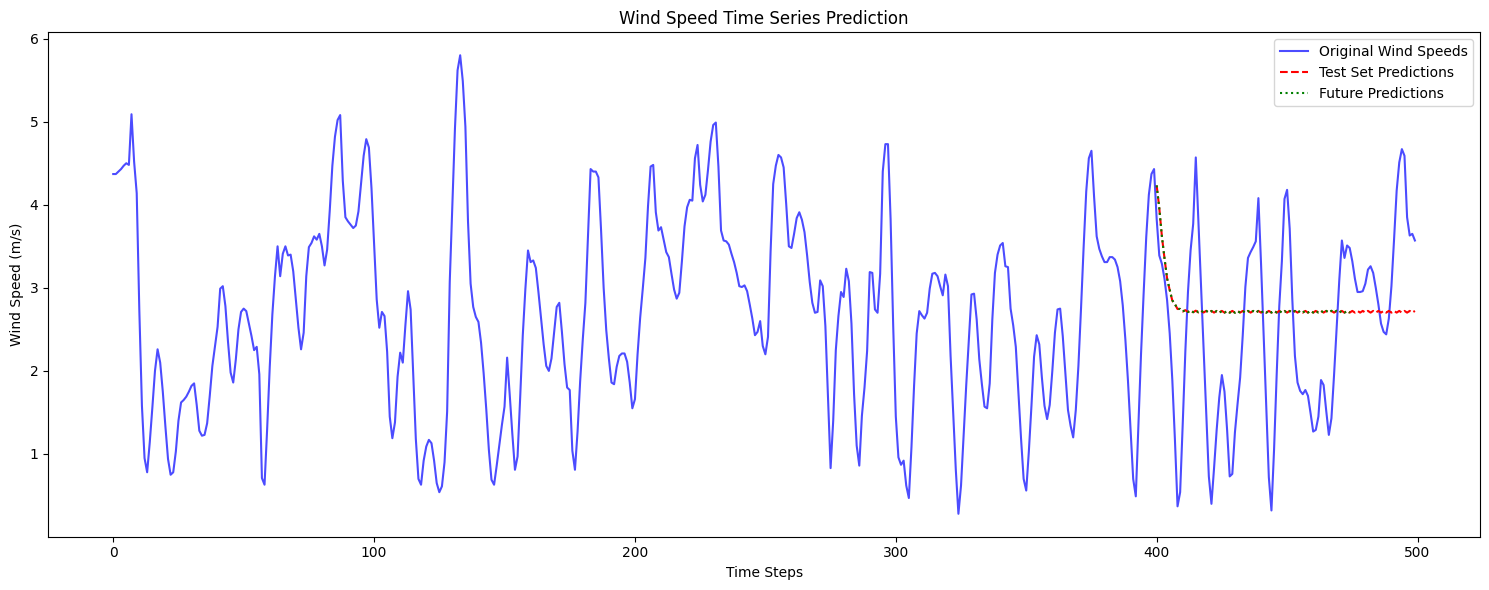


Predictions saved to wind_speed_predictions.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_csv('first_500_wind_speeds.csv')

# Prepare the time series data
wind_speeds = df['Wind Speed (m/s)']

# Split the data into training and testing sets
train_size = int(len(wind_speeds) * 0.8)
train, test = wind_speeds[:train_size], wind_speeds[train_size:]

# Find the best ARIMA parameters using Grid Search
def find_best_arima_params(train):
    best_aic = float('inf')
    best_order = None

    # Try different combinations of p, d, and q
    p_range = range(0, 5)
    d_range = range(0, 3)
    q_range = range(0, 5)

    for p in p_range:
        for d in d_range:
            for q in q_range:
                try:
                    model = ARIMA(train, order=(p,d,q))
                    model_fit = model.fit()

                    if model_fit.aic < best_aic:
                        best_aic = model_fit.aic
                        best_order = (p,d,q)
                except:
                    continue

    return best_order

# Find the best parameters
best_order = find_best_arima_params(train)
print("Best ARIMA Parameters:", best_order)

# Fit the ARIMA model
model = ARIMA(train, order=best_order)
model_fit = model.fit()

# Make predictions
predictions = []
history = list(train)

# Predict the next 75 values
for t in range(75):
    model = ARIMA(history, order=best_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(yhat)

# Evaluate the model on the test set
test_model = ARIMA(train, order=best_order)
test_model_fit = test_model.fit()
test_predictions = test_model_fit.forecast(len(test))

# Calculate accuracy metrics
mse = mean_squared_error(test, test_predictions)
mae = mean_absolute_error(test, test_predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - test_predictions) / test)) * 100

print("\nModel Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Visualization
plt.figure(figsize=(15,6))

# Original data
plt.plot(range(len(wind_speeds)), wind_speeds, label='Original Wind Speeds', color='blue', alpha=0.7)

# Test set predictions
plt.plot(range(train_size, train_size+len(test)), test_predictions,
         label='Test Set Predictions', color='red', linestyle='--')

# Future predictions
plt.plot(range(train_size, train_size+75), predictions,
         label='Future Predictions', color='green', linestyle=':')

plt.title('Wind Speed Time Series Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.tight_layout()
plt.show()

# Save predictions to CSV
predictions_df = pd.DataFrame({
    'Predicted Wind Speed (m/s)': predictions
})
predictions_df.to_csv('wind_speed_predictions.csv', index=False)
print("\nPredictions saved to wind_speed_predictions.csv")

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step

LSTM Model Performance Metrics:
Mean Squared Error (MSE): 0.4413
Root Mean Squared Error (RMSE): 0.6643
Mean Absolute Error (MAE): 0.5628
Mean Absolute Percentage Error (MAPE): 33.98%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━

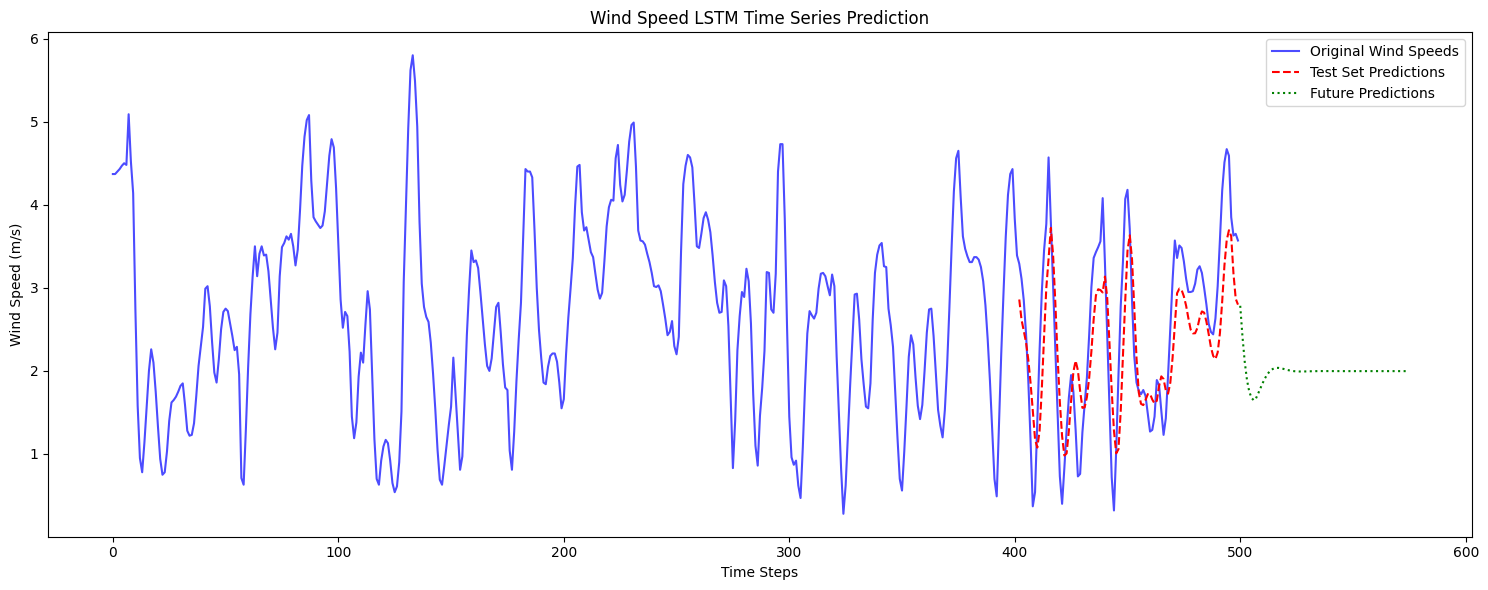


LSTM Predictions saved to wind_speed_lstm_predictions.csv


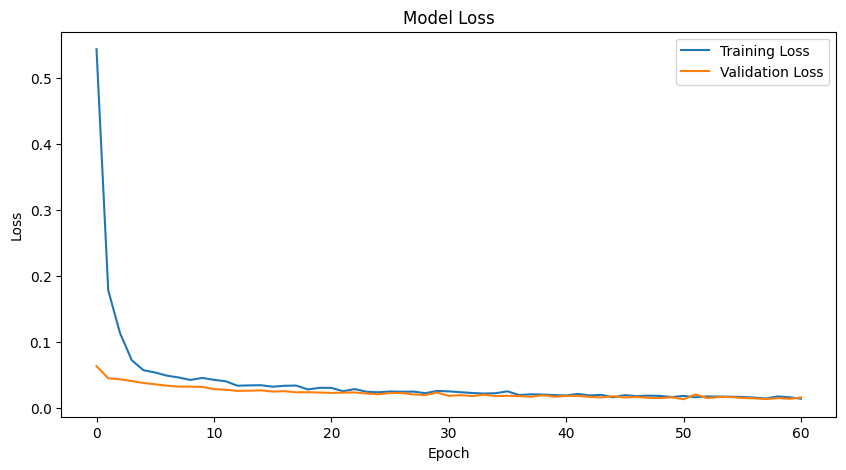

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the data
df = pd.read_csv('first_500_wind_speeds.csv')
wind_speeds = df['Wind Speed (m/s)'].values

# Normalize the data
scaler = MinMaxScaler()
scaled_wind_speeds = scaler.fit_transform(wind_speeds.reshape(-1, 1))

# Create sequence data for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Sequence length (number of previous time steps to use)
seq_length = 10

# Prepare sequences
X, y = create_sequences(scaled_wind_speeds, seq_length)

# Split the data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input for LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
def build_lstm_model(input_shape):
    model = Sequential([
        # First LSTM layer with dropout
        LSTM(50, input_shape=input_shape, return_sequences=True,
             activation='relu', kernel_initializer='he_normal'),
        Dropout(0.2),

        # Second LSTM layer
        LSTM(50, activation='relu', kernel_initializer='he_normal'),
        Dropout(0.2),

        # Dense output layer
        Dense(25, activation='relu', kernel_initializer='he_normal'),
        Dense(1)
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# Create and train the model
model = build_lstm_model((seq_length, 1))

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=0
)

# Predict on test set
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# Calculate performance metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

# Print metrics
print("\nLSTM Model Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Predict next 75 values
last_sequence = scaled_wind_speeds[-seq_length:].reshape((1, seq_length, 1))
future_predictions = []

for _ in range(75):
    # Predict next value
    next_pred = model.predict(last_sequence)

    # Add to predictions
    future_predictions.append(next_pred[0, 0])

    # Update the sequence
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[0, -1, 0] = next_pred[0, 0]

# Inverse transform future predictions
future_predictions_inv = scaler.inverse_transform(
    np.array(future_predictions).reshape(-1, 1)
)

# Visualization
plt.figure(figsize=(15,6))

# Original data
plt.plot(range(len(wind_speeds)), wind_speeds,
         label='Original Wind Speeds', color='blue', alpha=0.7)

# Test set predictions
plt.plot(range(len(wind_speeds)-len(y_test), len(wind_speeds)),
         y_pred_inv, label='Test Set Predictions', color='red', linestyle='--')

# Future predictions
plt.plot(range(len(wind_speeds), len(wind_speeds)+75),
         future_predictions_inv, label='Future Predictions',
         color='green', linestyle=':')

plt.title('Wind Speed LSTM Time Series Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.tight_layout()
plt.show()

# Save predictions to CSV
predictions_df = pd.DataFrame({
    'Predicted Wind Speed (m/s)': future_predictions_inv.flatten()
})
predictions_df.to_csv('wind_speed_lstm_predictions.csv', index=False)
print("\nLSTM Predictions saved to wind_speed_lstm_predictions.csv")

# Plot training history
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Epoch 1/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 0.1119 - mae: 0.3841 - val_loss: 0.0423 - val_mae: 0.1860
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0382 - mae: 0.1689 - val_loss: 0.0343 - val_mae: 0.1584
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0340 - mae: 0.1638 - val_loss: 0.0317 - val_mae: 0.1558
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0325 - mae: 0.1644 - val_loss: 0.0294 - val_mae: 0.1545
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0296 - mae: 0.1601 - val_loss: 0.0275 - val_mae: 0.1527
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0273 - mae: 0.1556 - val_loss: 0.0259 - val_mae: 0.1517
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0251 - mae: 0.1510 - val_loss: 0.0245 - val_mae: 0.1507
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0244 - mae: 0.1591 - val_loss: 0.0233 - val_mae: 0.1499
Epoch 9/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - lo

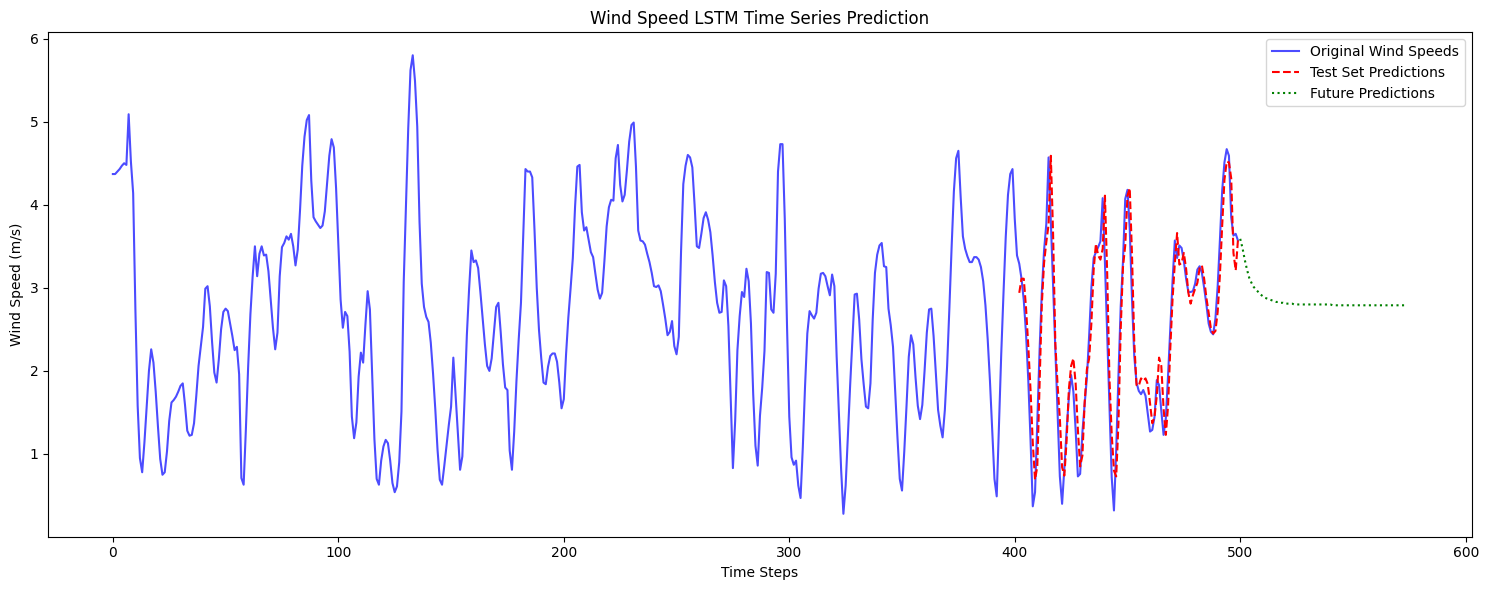


LSTM Predictions saved to wind_speed_lstm_predictions.csv


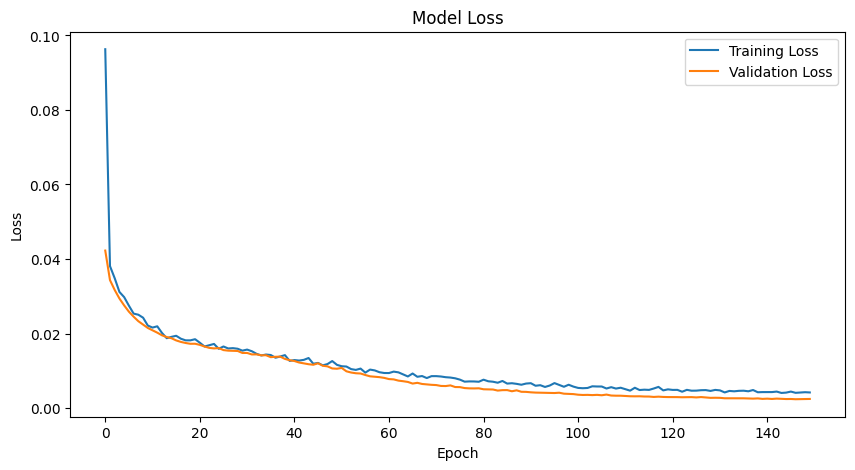

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the data
df = pd.read_csv('first_500_wind_speeds.csv')
wind_speeds = df['Wind Speed (m/s)'].values

# Normalize the data
scaler = MinMaxScaler()
scaled_wind_speeds = scaler.fit_transform(wind_speeds.reshape(-1, 1))

# Create sequence data for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Sequence length (number of previous time steps to use)
seq_length = 10

# Prepare sequences
X, y = create_sequences(scaled_wind_speeds, seq_length)

# Split the data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input for LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Adjusted LSTM Model for Improved Performance
def build_improved_lstm_model(input_shape):
    model = Sequential([
        # First LSTM layer
        LSTM(64, input_shape=input_shape, return_sequences=True,
             activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        Dropout(0.3),

        # Second LSTM layer
        LSTM(32, return_sequences=False, activation='tanh'),
        Dropout(0.3),

        # Dense layers
        Dense(16, activation='relu', kernel_initializer='he_normal'),
        Dense(1)  # Output layer
    ])

    # Compile the model
    # Compile the model
    model.compile(
      optimizer=Adam(learning_rate=0.0005),  # Lower learning rate
      loss=tf.keras.losses.Huber(),  # Correct Huber loss function
      metrics=['mae']
    )

    return model

# Create and train the model
model = build_improved_lstm_model((seq_length, 1))

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=150,  # Increased epochs
    batch_size=16,  # Smaller batch size for more updates
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Predict on test set with 2 decimal precision
y_pred = model.predict(X_test)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# Round predictions to 2 decimal places
y_test_inv = np.round(y_test_inv, 2)
y_pred_inv = np.round(y_pred_inv, 2)

# Calculate performance metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

# Print metrics
print("\nImproved LSTM Model Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Predict next 75 values
last_sequence = scaled_wind_speeds[-seq_length:].reshape((1, seq_length, 1))
future_predictions = []

for _ in range(75):
    # Predict next value
    next_pred = model.predict(last_sequence)

    # Add to predictions
    future_predictions.append(next_pred[0, 0])

    # Update the sequence
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[0, -1, 0] = next_pred[0, 0]

# Inverse transform future predictions
future_predictions_inv = scaler.inverse_transform(
    np.array(future_predictions).reshape(-1, 1)
)

# Round future predictions to 2 decimal places
future_predictions_inv = np.round(future_predictions_inv, 2)

# Visualization
plt.figure(figsize=(15,6))

# Original data
plt.plot(range(len(wind_speeds)), wind_speeds,
         label='Original Wind Speeds', color='blue', alpha=0.7)

# Test set predictions
plt.plot(range(len(wind_speeds)-len(y_test), len(wind_speeds)),
         y_pred_inv, label='Test Set Predictions', color='red', linestyle='--')

# Future predictions
plt.plot(range(len(wind_speeds), len(wind_speeds)+75),
         future_predictions_inv, label='Future Predictions',
         color='green', linestyle=':')

plt.title('Wind Speed LSTM Time Series Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.tight_layout()
plt.show()

# Save predictions to CSV
predictions_df = pd.DataFrame({
    'Predicted Wind Speed (m/s)': future_predictions_inv.flatten()
})
predictions_df.to_csv('wind_speed_lstm_predictions.csv', index=False)
print("\nLSTM Predictions saved to wind_speed_lstm_predictions.csv")

# Plot training history
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Mean Squared Error: 0.13275017354345442
Mean Absolute Error: 0.2554701770522551
R² Score: 0.9648047443285424


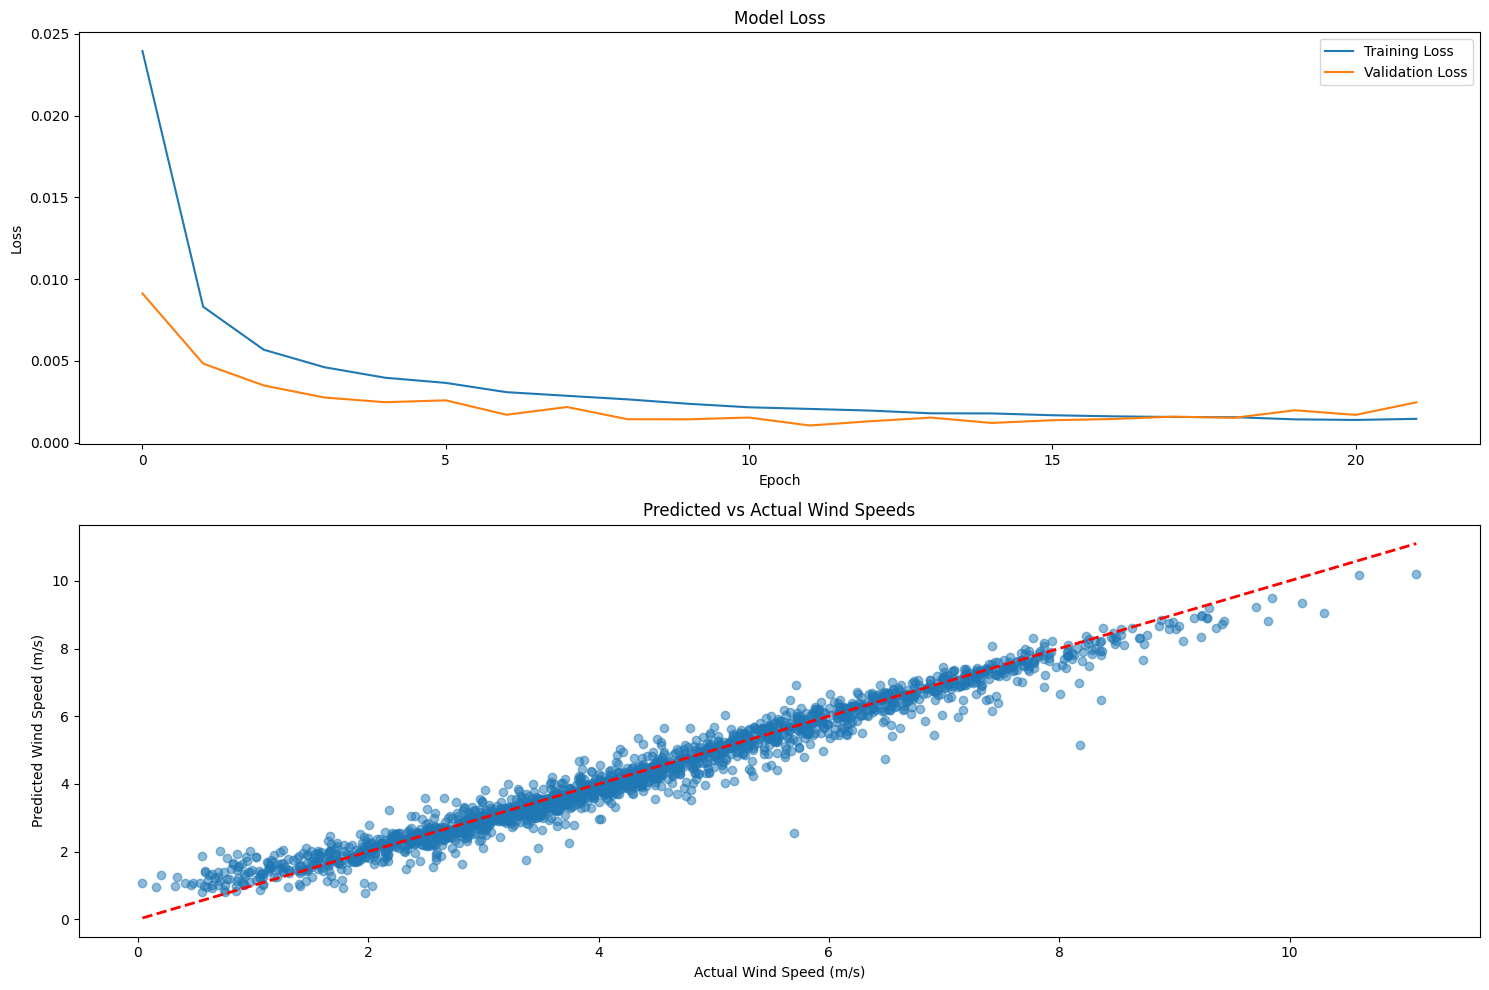

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
def load_data(file_path):
    """
    Load wind speed data from a CSV file

    Parameters:
    file_path (str): Path to the CSV file

    Returns:
    pandas.DataFrame: Loaded dataset
    """
    try:
        df = pd.read_csv(file_path)
        return df
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# Prepare data for LSTM model
def prepare_data(data, look_back=24):
    """
    Prepare data for time series prediction

    Parameters:
    data (numpy.array): Input data
    look_back (int): Number of previous time steps to use for prediction

    Returns:
    X (numpy.array): Input sequences
    y (numpy.array): Target values
    """
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i+look_back])
        y.append(data[i+look_back])
    return np.array(X), np.array(y)

# Create LSTM Model
def create_lstm_model(input_shape):
    """
    Create LSTM neural network model

    Parameters:
    input_shape (tuple): Shape of input data

    Returns:
    tensorflow.keras.Model: Compiled LSTM model
    """
    model = Sequential([
        # First LSTM layer with dropout
        LSTM(50, input_shape=input_shape, return_sequences=True, activation='relu'),
        Dropout(0.2),

        # Second LSTM layer
        LSTM(50, activation='relu'),
        Dropout(0.2),

        # Dense layers for final prediction
        Dense(25, activation='relu'),
        Dense(1)
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# Main wind speed prediction script
def wind_speed_prediction(file_path):
    """
    Complete wind speed prediction pipeline

    Parameters:
    file_path (str): Path to wind speed data CSV
    """
    # Load data
    df = load_data(file_path)
    if df is None:
        return

    # Extract wind speed column
    wind_speeds = df['Wind Speed (m/s)'].values

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    normalized_speeds = scaler.fit_transform(wind_speeds.reshape(-1, 1))

    # Prepare sequences
    look_back = 24  # Use previous 24 hours to predict next hour
    X, y = prepare_data(normalized_speeds, look_back)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Reshape for LSTM [samples, time steps, features]
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Create and train model
    model = create_lstm_model((look_back, 1))

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    # Fit the model
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=0
    )

    # Predict
    y_pred = model.predict(X_test)

    # Inverse transform predictions
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
    y_pred_inv = scaler.inverse_transform(y_pred)

    # Calculate metrics
    mse = mean_squared_error(y_test_inv, y_pred_inv)
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    r2 = r2_score(y_test_inv, y_pred_inv)

    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R² Score: {r2}")

    # Visualization
    plt.figure(figsize=(15, 10))

    # Loss plot
    plt.subplot(2, 1, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Prediction vs Actual
    plt.subplot(2, 1, 2)
    plt.scatter(y_test_inv, y_pred_inv, alpha=0.5)
    plt.plot([y_test_inv.min(), y_test_inv.max()],
             [y_test_inv.min(), y_test_inv.max()],
             'r--', lw=2)
    plt.title('Predicted vs Actual Wind Speeds')
    plt.xlabel('Actual Wind Speed (m/s)')
    plt.ylabel('Predicted Wind Speed (m/s)')

    plt.tight_layout()
    plt.show()

# Run the prediction
wind_speed_prediction('first_10000_wind_speeds.csv')